# Цель работы
Проверить освоение студентами базовых приемов работы с простыми моделями регрессии, применить их при анализе реальных данных.

---
# Методические указания

- Контрольная работа выполняется в аудитории. В начале занятия преподаватель распределяет по студентам датасеты (задания). 
- Распределение должно проходить случайным образом, но двум студентам одной группы не должны достаться одинаковые задания.
- После получения задания студенты выполняют работу на лабораторных компьютерах.
- Работа должна быть выполнена студентом самостоятельно. Работа выполняется в виде ноутбука формата .ipynb
- После завершения выполнения работы студент должен сдать работу преподавателю. 
- Работы сдаются в электронном виде с корпоративной почты студента на корпоративную почту преподавателя. 
- Работа должна быть сдана не позже окончания аудиторного занятия.

# Критерии оценки
- Код должен выполняться без ошибок. Программные ошибки - сразу 0 баллов.
- Код должен содержать пояснения в виде ячеек с текстом. В пояснениях нужно писать значимые выводы по ходу выполнения работы.
- Все графики должны быть правильно подписаны и понятны.
- Текстовый вывод должен быть нагляден и отформатирован. Численные значения - округлены до разумного количества значащих цифр.


---
# Содержание работы

In [427]:
import sklearn
from sklearn.datasets import fetch_openml, load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import pandas as pd

In [428]:
import warnings
warnings.filterwarnings(action="ignore", category=UserWarning)
warnings.filterwarnings(action="ignore", category=FutureWarning)

---
1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`.

In [429]:
dataset = fetch_openml("diabetes")
dataset = load_diabetes()

In [430]:
data = pd.DataFrame(dataset.data.copy())
# target_name = dataset.details["default_target_attribute"]
# data[target_name] = dataset.target
data['target'] = dataset.target
# print("target:", target_name)
data.head()

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


---
Выведите текстовое описание загруженного датасета.

In [431]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

---
Обозначьте целевую переменную за `y`, а остальные данные за `X`.

In [432]:
# Целевая переменная
Y = data.iloc[:, -1]

In [433]:
# Признаки
X = data.iloc[:, :-1]

---
2. (1 балл) Выведите основную статистическую информацию о данных. Сделайте количественное описание датасета: число строк (объектов), число столбцов (признаков), статистику по признакам.


In [434]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
 1   1       442 non-null    float64
 2   2       442 non-null    float64
 3   3       442 non-null    float64
 4   4       442 non-null    float64
 5   5       442 non-null    float64
 6   6       442 non-null    float64
 7   7       442 non-null    float64
 8   8       442 non-null    float64
 9   9       442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [435]:
print("Число строк:", data.shape[0])
print("Число столбцов:", data.shape[1])

Число строк: 442
Число столбцов: 11


In [436]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


---
3. (1 балл) Выведите тип данных каждого признака и целевой переменной. Убедитесь, что в данных все признаки являются числовыми. В случае, если это не так, удалите нечисловые колонки.


In [437]:
# Пройдемся по всем признакам
for col in X.columns:
    # Вывведем тип данных признака
    print(col,"-", X[col].dtype)
    # Если какой-то тип данных не определяется как тип данных, будет ошибка
    try:
        # Проверяем является ли тип данных колонки числовым
        num = np.issubdtype(X[col].dtype, np.number)
    except TypeError:
        num = False
    
    # Если тип данных колонки не числовой, удаляем колонку
    if not num:
        X = X.drop(col, axis=1)

print('target',"-", Y.dtype)

0 - float64
1 - float64
2 - float64
3 - float64
4 - float64
5 - float64
6 - float64
7 - float64
8 - float64
9 - float64
target - float64


---
4. (1 балл) Убедитесь, что нет пропущенных значений в данных и у целевой переменной. В случае, если это не так, заполните пропуски медианными значениями.


In [438]:
# Заменим nan на средние значения по столбцу
X = X.fillna(X.median())
Y = Y.fillna(Y.median())

---
5. (1 балл) Постройте гистограмму распределения целевой переменной. Сделайте вывод по графику. Предположите, какому виду распределения она принадлежит.


<Axes: ylabel='Frequency'>

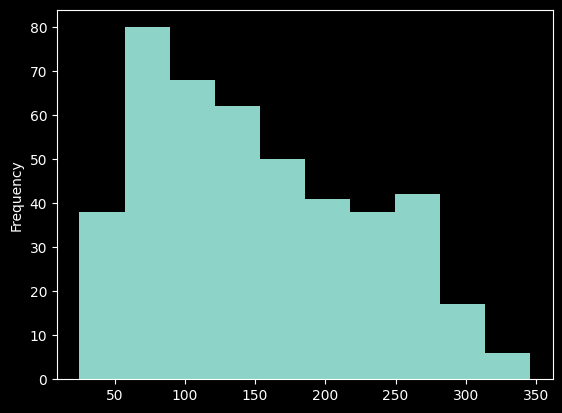

In [439]:
# Построим распределение целевой переменной
Y.plot.hist()
# Распределение похоже на нормальное, со сдвигом влево

---
6. (4 балл) Обучите модель линейной регрессии на рассматриваемых данных, написанную своими руками. Проиллюстрируйте работу модели графиком обучения и распределения целевой переменной. Выведите уравнение полученной гиперплоскости.


In [440]:
class Model(object):
    """Модель множественной регрессии"""
    def __init__(self, X, Y):
        self.b = [0 for i in range(X.shape[0] + 1)]
           
    def predict(self, X):
        answer = self.b[0]
        for i in range(1, len(self.b)):
            answer += self.b[i] * X[i-1]
        return answer
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y[0])**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.01, accuracy=1e-5, max_steps=20000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            
            dJ0 = sum(self.predict(X) - Y[0]) /len(X)
            self.b[0] -= alpha * dJ0
            
            for j in range(1, len(self.b)):
                dJj = sum((self.predict(X) - Y[0]) * X[j-1]) / len(X)
                self.b[j] -= alpha * dJj
  
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if step > 1 and new_err + accuracy > errors[-2]:
                break
        return steps, errors
    

In [441]:

Y_df = pd.DataFrame(Y)
Y_df.columns = [0]
X_v = np.array(X)
model = Model(X_v.T, Y_df)
steps, errors = model.fit(X_v.T, Y_df)
J = model.error(X_v.T, Y_df)
print("error after gradient descent:", J)
model.b

error after gradient descent: 63551.21576942613


[152.13348416289602,
 -6.946223560029187,
 -236.53356606997764,
 527.8823782199487,
 321.8362274978096,
 -149.80364558459206,
 -38.24931986716371,
 -180.04069384149588,
 105.40743870524277,
 509.15632301347574,
 69.78943358527331]

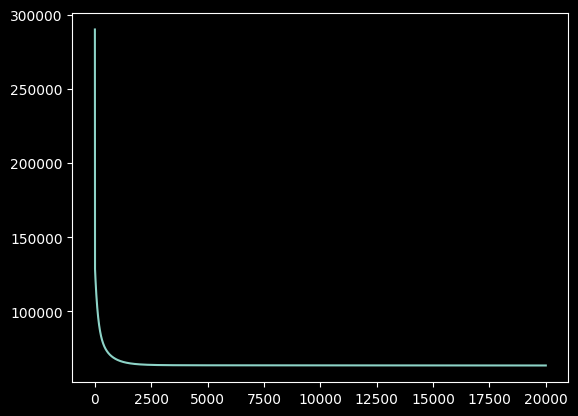

In [446]:
plt.plot(steps, errors)

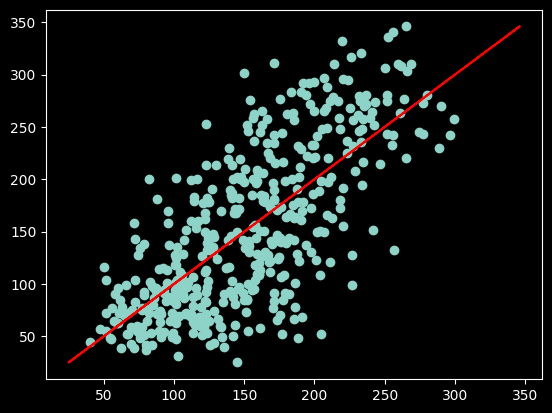

In [457]:
y_pred = model.predict(X)
plt.scatter(y_pred, Y.values)
plt.plot(Y, Y, 'r')

---
7. (2 балл) Обучите модель `LinearRegression()` линейной регрессии на рассматриваемых данных из библиотеки `sklearn`. Выведете уравнение полученной гиперплоскости. Убедитесь, что уравнения гиперплоскостей, полученных с помощью модели написанной своими руками и библиотечной, будут примерно одинаковыми.


In [442]:
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression()

In [443]:
model1.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

---
8. (1 балл) Оцените работу моделей, рассчитав для каждой из них метрики: коэффициент детерминации и ошибку MSE. Сделайте выводы по качеству работы моделей.


In [444]:
# Для ручной модели

In [445]:
# Для модели sklearn
y_pred = model1.predict(X)
print("MSE:", mean_squared_error(Y, y_pred))
print("Коэффициент детерминации:", model1.score(X, Y))

MSE: 2859.6963475867497
Коэффициент детерминации: 0.5177484222203499


1) ✅
2) ✅
3) ✅
4) ✅
5) ✅
6) ❌
7) ✅
8) ❌